In [1]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import default_timer as timer

# Data Wrangling

## Gather

`Data 1:` Import File on hand (**twitter_archived**)

In [2]:
twitter_archived = pd.read_csv("twitter-archive-enhanced.csv")

`Data 2:` File from Udacity's server (**image_prediction**)

In [3]:
#get request
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
#check for content type
response.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [5]:
open('image_predictions.tsv', 'wb').write(response.content)

335079

In [6]:
#save decode content and save as a pandas dataframe
image_prediction = pd.read_csv('image_predictions.tsv',sep ='\t')

`Data 3:` Get data from twitter's api (**tweet_data**)

In [7]:
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hideen' 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [8]:
tweet_ids = twitter_archived['tweet_id'].values

In [9]:
# code for the getting txt file, already provided
'''
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n'

In [10]:
tweet_data = []
with open('tweet_json.txt','r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_data.append(tweet)
        except:
            continue

In [11]:
tweet_data[:2]

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'}

In [12]:
tweet_info = pd.DataFrame()

In [13]:
tweet_info['tweet_id']= list(map(lambda tweet: tweet['id'], tweet_data))
tweet_info['retweet_count'] = list(map (lambda tweet: tweet['retweet_count'], tweet_data))
tweet_info['favorite_count'] = list(map (lambda tweet: tweet['favorite_count'], tweet_data))

## Assess

### Data 1 (**twitter_archived**)  

`Quality`
> * Remove the row where the denominator is 0
> * Timestamp column and retweeted_timestamp is not a datetime object, need to change.
> * Some dog names are not actually dog names.
> * Remove rows where the tweets are retweets.
> * Remove columns that have retweets in them.
> * Rename the link in source column to just the name.
> * Change None values to NaN values

`Tidiness`
> * Change last four columns into a column (wide to long)

In [14]:
twitter_archived.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [15]:
twitter_archived.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
619,796149749086875649,NaN,NaN,2016-11-09 00:37:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She just turned on the news. Off...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796149749...,11,10,Ruby,None,None,None,None
1047,743510151680958465,NaN,NaN,2016-06-16 18:26:48 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Beya. She doesn't want to swim, so she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/743510151...,13,10,Beya,None,None,None,None
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
1667,682662431982772225,NaN,NaN,2015-12-31 20:39:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Joey and Izzy. Joey only has one ear that...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682662431...,11,10,Joey,None,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None


In [16]:
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_archived.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
#some names are not actual names
twitter_archived[twitter_archived['name'].str.islower()]['name'].value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
getting          2
mad              2
not              2
actually         2
officially       1
my               1
such             1
his              1
this             1
infuriating      1
incredibly       1
unacceptable     1
old              1
all              1
space            1
by               1
life             1
light            1
Name: name, dtype: int64

In [19]:
twitter_archived['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Data 2 (**image_prediction**)  

`Quality:` 
> * Columns p1, p2, p3 dont have consistent use of upper/lower cases
> * Some values in p1,p2,p3 have '-' change all to underscore "__"

`Tidiness`
> * Change column names to fit value description

In [20]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,9.248170e-02,False
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,cocker_spaniel,0.701852,True,golden_retriever,0.120345,True,Labrador_retriever,3.632020e-02,True
1760,825876512159186944,https://pbs.twimg.com/media/C3YaSnQWAAILgz0.jpg,1,shopping_cart,0.995941,False,shopping_basket,0.004057,False,mousetrap,8.832830e-07,False
694,684241637099323392,https://pbs.twimg.com/media/CX7qIcdWcAELJ7N.jpg,1,Pembroke,0.508498,True,black-footed_ferret,0.115532,False,weasel,5.128010e-02,False
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,1.787950e-01,True


In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Data 2 (**tweet_info**)  

In [23]:
tweet_info.sample(5)

,tweet_id,retweet_count,favorite_count
176,856526610513747968,1852,11751
591,797545162159308800,5127,15199
960,668190681446379520,193,648
620,793271401113350145,2515,9087
605,796031486298386433,3915,11325


In [24]:
tweet_info.describe()

,tweet_id,retweet_count,favorite_count
count,1.082000e+03,1082.000000,1082.000000
mean,7.914090e+17,4072.151571,11730.008318
std,6.814972e+16,5312.038755,14481.610859
min,6.660209e+17,1.000000,0.000000
25%,7.685996e+17,1114.250000,455.250000
50%,8.033511e+17,2727.500000,8482.500000
75%,8.391682e+17,4987.000000,16763.500000
max,8.924206e+17,58528.000000,136830.000000


In [25]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082 entries, 0 to 1081
Data columns (total 3 columns):
tweet_id          1082 non-null int64
retweet_count     1082 non-null int64
favorite_count    1082 non-null int64
dtypes: int64(3)
memory usage: 25.4 KB


## Clean

In [26]:
twitter_archived_copy = twitter_archived.copy()

`Define`  

In **twitter_archived** we cannot have a 0 value as a denominator, drop the column where rating_denominator = 0.

`Code`

In [27]:
# this is the column where rating == 0
twitter_archived_copy[twitter_archived_copy['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [28]:
#drop index 313
twitter_archived_copy.drop(313,axis = 0,inplace= True)

In [29]:
#reset the index
twitter_archived_copy.reset_index(inplace=True)

`Test`

In [30]:
twitter_archived_copy[twitter_archived_copy['rating_denominator'] == 0]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


  `Define`  
  
  The timestamp column & retweeted_status_timestamp in **twitter_archived** shows dates but is not a datetime object, change the columns into a datetime object. 

`Code`

In [31]:
#change timestamp to datetime
twitter_archived_copy['timestamp'] = pd.to_datetime(twitter_archived_copy['timestamp'])
twitter_archived_copy['retweeted_status_timestamp'] = pd.to_datetime(twitter_archived_copy['retweeted_status_timestamp'])

`Test`

In [32]:
twitter_archived_copy['timestamp'].dtype

datetime64[ns, UTC]

In [33]:
twitter_archived_copy['retweeted_status_timestamp'].dtype

datetime64[ns, UTC]

-----
`Define`  

There are some values in the name column of **twitter_archived** where the names are not actual names. Find all non names and change them to "None"

`Code`

In [34]:
#change not names to "None"
not_names = twitter_archived_copy[twitter_archived_copy['name'].str.islower()]['name'].unique()
for n in not_names:
    twitter_archived_copy['name'].replace(n,'None',inplace = True)

`Test`

In [35]:
twitter_archived_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

-----   
`Define`  

From **twitter_archived** we only want tweets where the tweets are original and not retweets. Find the rows where the tweet is a retweet.

`Code`

In [36]:
#only get the rows where the tweet was not a repeat
twitter_archived_copy = twitter_archived_copy[twitter_archived_copy['retweeted_status_id'].isnull()]

`Test`

In [37]:
twitter_archived_copy['retweeted_status_id'].notna().sum()

0

-----
`Define`  

From **twitter_archived** change the values in name,doggo,floofer,pupper, & puppo where values is None. Change the None to NaN.


`Code`

In [38]:
#from cols name,doggo,floofer,pupper,puppo change none to NaN
twitter_archived_copy[['name','doggo','floofer','pupper','puppo']] = twitter_archived_copy.loc[:,['name','doggo','floofer','pupper','puppo']].replace(["None"],np.nan)

`Test`

In [39]:
twitter_archived_copy[['name','doggo','floofer','pupper','puppo']].head()

,name,doggo,floofer,pupper,puppo
0,Phineas,NaN,NaN,NaN,NaN
1,Tilly,NaN,NaN,NaN,NaN
2,Archie,NaN,NaN,NaN,NaN
3,Darla,NaN,NaN,NaN,NaN
4,Franklin,NaN,NaN,NaN,NaN


-----  
`Define`  

In **twitter_archived** the columns where the name has 'retweeted' is not necessary, as this data wont have any retweets


`Code`

In [40]:
#drop all columns with retweeted
twitter_archived_copy \
= twitter_archived_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis =1)

`Test`

In [41]:
twitter_archived_copy.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

-----  
`Define`  

In **twitter_archived** the source column has a reference link. The refrence link wont be necessary, only get the name of the source.

`Code`

In [42]:
#extract the string in source between ">     <"
twitter_archived_copy['source'] = twitter_archived_copy['source'].str.extract('((?<=\>).+?(?=\<))')

`Test`

In [43]:
twitter_archived_copy['source'].value_counts()

Twitter for iPhone     2041
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

----- 
`Define` 

In **twitter_archived** add all 'dog stages'columns into one'dog_stages' column. In essence change cols doggo,floofer,pupper,& puppo from a wide format into a long format. Then drop all the wide formatted columns.

`Code`

In [44]:
#join doggo, floofer, pupper, puppo columns
twitter_archived_copy['dog_stages'] =\
twitter_archived_copy[['doggo','floofer','pupper','puppo']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [45]:
#drop the doggo,floofer,pupper,puppo columns
twitter_archived_copy\
= twitter_archived_copy.drop(['doggo','floofer','pupper','puppo'],axis = 1)

In [46]:
#replace ' ' with NaN for dog_stages
twitter_archived_copy.replace('',np.nan, inplace = True)

`Test`

In [47]:
twitter_archived_copy.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [48]:
twitter_archived_copy['dog_stages'].value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stages, dtype: int64

-----

In [49]:
image_prediction_copy = image_prediction.copy()

-----  
`Define`  

In **image_prediction** some picture names are in lower case some are in upper case. Change them all to lower case.

`Code`

In [50]:
#change every value in the cols to lower()
image_prediction_copy['p1'] = image_prediction_copy['p1'].str.lower()
image_prediction_copy['p2'] = image_prediction_copy['p2'].str.lower()
image_prediction_copy['p3'] = image_prediction_copy['p3'].str.lower()

`Test`

In [51]:
image_prediction_copy[['p1','p2','p3']].head(5)

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman


-----  
`Define`

In **image_prediction** for columns p1,p2,p3 some columns use - instead of _. Make the columns consistent by replacing all - with an underscore " _"

`Code`

In [52]:
#change '-' to ' _'
for p in ['p1','p2','p3']:
    image_prediction_copy[p] = image_prediction_copy[p].str.replace('-','_')

`Test`

In [53]:
image_prediction_copy['p1'].str.contains('-').sum() + \
image_prediction_copy['p2'].str.contains('-').sum() + \
image_prediction_copy['p3'].str.contains('-').sum()

0

-----

`Define`

Make column names a little more descriptive. Rename p1_conf,p2_conf,p3_conf into p1_probability,p2_probability,p3_probability.

`Code`

In [54]:
columns={"p1_conf":"p1_probability","p2_conf":"p2_probability","p3_conf":"p3_probability"}
image_prediction_copy.rename(columns = columns, inplace = True)

`Test`

In [55]:
image_prediction_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_probability', 'p1_dog',
       'p2', 'p2_probability', 'p2_dog', 'p3', 'p3_probability', 'p3_dog'],
      dtype='object')

------  
`Define`  

Join all three dataframes **twitter_archived**, **image_prediction**, **tweet_info** into one master dataframe

`Code`

In [56]:
twitter_archive_master =\
pd.merge(pd.merge(twitter_archived_copy,image_prediction_copy, on ='tweet_id',how = 'left'), tweet_info, on ='tweet_id', how = 'left')

`Test`

In [57]:
twitter_archive_master.head()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p1_probability,p1_dog,p2,p2_probability,p2_dog,p3,p3_probability,p3_dog,retweet_count,favorite_count
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7938.0,37139.0
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5900.0,31938.0
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3899.0,24057.0
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8097.0,40454.0
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,...,0.555712,True,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,8779.0,38671.0


# Exploratory Data Analysis

In [58]:
twitter_archive_master.columns

Index(['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1',
       'p1_probability', 'p1_dog', 'p2', 'p2_probability', 'p2_dog', 'p3',
       'p3_probability', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

Text(0.5, 1.0, 'Number different of dog stages')

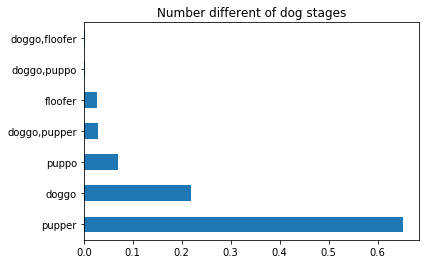

In [59]:
dog_stages_v_count = twitter_archive_master['dog_stages'].value_counts(normalize= True)
dog_stages_v_count.plot.barh()
plt.title('Number different of dog stages')

In [60]:
dog_stages_favorite_count = twitter_archive_master.groupby('dog_stages')['favorite_count'].mean()

In [61]:
print(dog_stages_favorite_count)

dog_stages
doggo            16934.019231
doggo,floofer    16171.000000
doggo,pupper      8208.714286
doggo,puppo      45275.000000
floofer          21541.000000
pupper           18789.250000
puppo            25476.500000
Name: favorite_count, dtype: float64


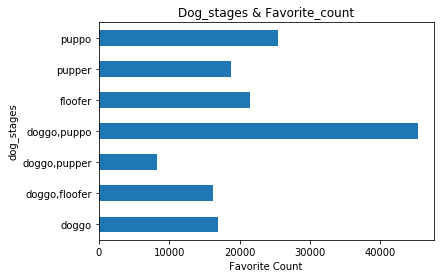

In [62]:
dog_stages_favorite_count.plot.barh(title ='Dog_stages & Favorite_count')
plt.xlabel('Favorite Count');

In [63]:
post_hour = twitter_archive_master['timestamp'].dt.hour

In [64]:
hour_fav_count = twitter_archive_master.groupby(post_hour)['favorite_count'].mean()

In [65]:
hour_fav_count

timestamp
0     18416.838926
1     13106.899083
2      9272.341463
3      9525.521739
4      3286.409091
5       673.500000
6     62309.000000
12      263.000000
13    11066.000000
14     5601.000000
15    15944.448980
16    17132.340741
17    11897.081633
18    15165.863636
19     9656.208333
20    12731.628571
21    11393.371429
22    12235.605263
23    11877.619048
Name: favorite_count, dtype: float64

Text(0.5, 1.0, 'Hour of post and Favorite_count')

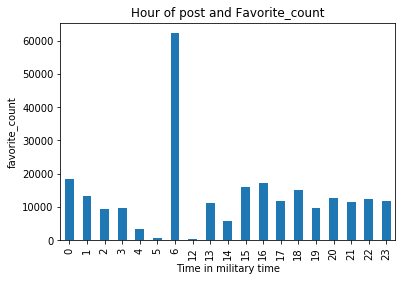

In [66]:
hour_fav_count.plot.bar()
plt.ylabel('favorite_count')
plt.xlabel('Time in military time')
plt.title('Hour of post and Favorite_count')

In [67]:
twitter_archive_master['rating'] =\
twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']

In [68]:
twitter_archive_master.describe()

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,p1_probability,p2_probability,p3_probability,retweet_count,favorite_count,rating
count,2174.000000,2.174000e+03,7.700000e+01,7.700000e+01,2174.000000,2174.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,926.000000,926.000000,2174.000000
mean,1232.284729,7.370753e+17,7.443425e+17,2.040329e+16,12.779669,10.497700,1.203109,0.593941,1.344195e-01,6.024848e-02,3678.553996,13703.793737,1.223398
std,674.104365,6.746937e+16,7.561569e+16,1.260797e+17,43.198178,7.017088,0.560777,0.271954,1.006807e-01,5.089067e-02,5043.482787,14765.848304,4.247731
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,67.000000,0.000000
25%,676.500000,6.768326e+17,6.757073e+17,3.589728e+08,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,967.750000,4161.500000,1.000000
50%,1266.500000,7.097095e+17,7.032559e+17,4.196984e+09,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,2462.500000,10410.500000,1.100000
75%,1809.750000,7.893029e+17,8.233264e+17,4.196984e+09,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,4383.750000,19529.750000,1.200000
max,2355.000000,8.924206e+17,8.862664e+17,8.405479e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,58528.000000,136830.000000,177.600000


### Insights

* The most popular dog type is pupper
* The doggo,pupper group has the highest amount of average favorite counts
* 6:00 is the time when the posts get the greatest amount of favorite counts
* The mean rating for the dogs are 1.222
* The STD for the numerator was much greater than the STD of the denominator.

In [69]:
#turn master file to csv for the future
twitter_archive_master.to_csv('twitter_archive_master',index=False)